In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data():
    datas = list()
    save_path = "../Output/CIFAR100-*B0-D0*-N100-P0.01*/s[1-9].csv"
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # print(data_temp.size)
    return data_temp

In [19]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        if "LN" in path: continue

        if "Mean1" in path:
            data["Mode"] += "Mean1"
            continue
        elif "Mean2" in path:
            data["Mode"] += "Mean2"
            continue
        elif "Mean5" in path:
            data["Mode"] += "Mean5"
            # continue
        else:
            continue

        if "FCs0.5E1" in path: 
            data["Mode"] += "_s05e1"
            # continue
        elif "FCs0.1E1" in path: 
            data["Mode"] += "_s01e1"
            # continue
        elif "FCs0.05E1" in path: 
            data["Mode"] += "_s005e1"
            # continue
        elif "FCs0.01E1" in path: 
            data["Mode"] += "_s001e1"
            # continue
        elif "FCs0.5E2" in path: 
            data["Mode"] += "_s05e2"
            # continue
        elif "FCs0.1E2" in path: 
            data["Mode"] += "_s01e2"
            # continue
        elif "FCs0.05E2" in path: 
            data["Mode"] += "_s005e2"
            # continue
        elif "FCs0.01E2" in path: 
            data["Mode"] += "_s001e2"
        elif "FCs0.5E3" in path: 
            data["Mode"] += "_s05e3"
            # continue
        elif "FCs0.1E3" in path: 
            data["Mode"] += "_s01e3"
            # continue
        elif "FCs0.05E3" in path: 
            data["Mode"] += "_s005e3"
            # continue
        elif "FCs0.01E3" in path: 
            data["Mode"] += "_s001e3"
        elif "FCs0.5E4" in path: 
            data["Mode"] += "_s05e4"
            # continue
        elif "FCs0.1E4" in path: 
            data["Mode"] += "_s01e4"
            # continue
        elif "FCs0.05E4" in path: 
            data["Mode"] += "_s005e4"
            # continue
        elif "FCs0.01E4" in path: 
            data["Mode"] += "_s001e4"
        elif "FCs0.5E5" in path: 
            data["Mode"] += "_s05e5"
            # continue
        elif "FCs0.1E5" in path: 
            data["Mode"] += "_s01e5"
            # continue
        elif "FCs0.05E5" in path: 
            data["Mode"] += "_s005e5"
            # continue
        elif "FCs0.01E5" in path: 
            data["Mode"] += "_s001e5"
            # continue
        else:
            print(path)

        if "w1b1" in path: 
            data["Mode"] += "_w1b1"
            # continue
        elif "w1" in path: 
            data["Mode"] += "_w1"
            # continue
        elif "b1" in path: 
            data["Mode"] += "_b1"
            continue

        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

../Output/CIFAR100-feddyn-G00-B0-D0.3-N100-P0.01/s4.csv
../Output/CIFAR100-feddyn-G00-B0-D0.3-N100-P0.01/s1.csv
../Output/CIFAR100-feddyn-G00-B0-D0.3-N100-P0.01/s2.csv
../Output/CIFAR100-feddyn-G00-B0-D0.3-N100-P0.01/s3.csv
../Output/CIFAR100-scaffold-G00-B0-D0-N100-P0.01/s4.csv
../Output/CIFAR100-scaffold-G00-B0-D0-N100-P0.01/s1.csv
../Output/CIFAR100-scaffold-G00-B0-D0-N100-P0.01/s2.csv
../Output/CIFAR100-scaffold-G00-B0-D0-N100-P0.01/s3.csv
../Output/CIFAR100-scaffold-G00-B0-D0.3-N100-P0.01/s4.csv
../Output/CIFAR100-scaffold-G00-B0-D0.3-N100-P0.01/s1.csv
../Output/CIFAR100-scaffold-G00-B0-D0.3-N100-P0.01/s2.csv
../Output/CIFAR100-scaffold-G00-B0-D0.3-N100-P0.01/s3.csv
../Output/CIFAR100-fedprox-G00-B0-D0.3-N100-P0.01/s4.csv
../Output/CIFAR100-fedprox-G00-B0-D0.3-N100-P0.01/s1.csv
../Output/CIFAR100-fedprox-G00-B0-D0.3-N100-P0.01/s2.csv
../Output/CIFAR100-fedprox-G00-B0-D0.3-N100-P0.01/s3.csv
../Output/CIFAR100-fedprox-G00-B0-D0-N100-P0.01/s4.csv
../Output/CIFAR100-fedprox-G00-B0-D0-

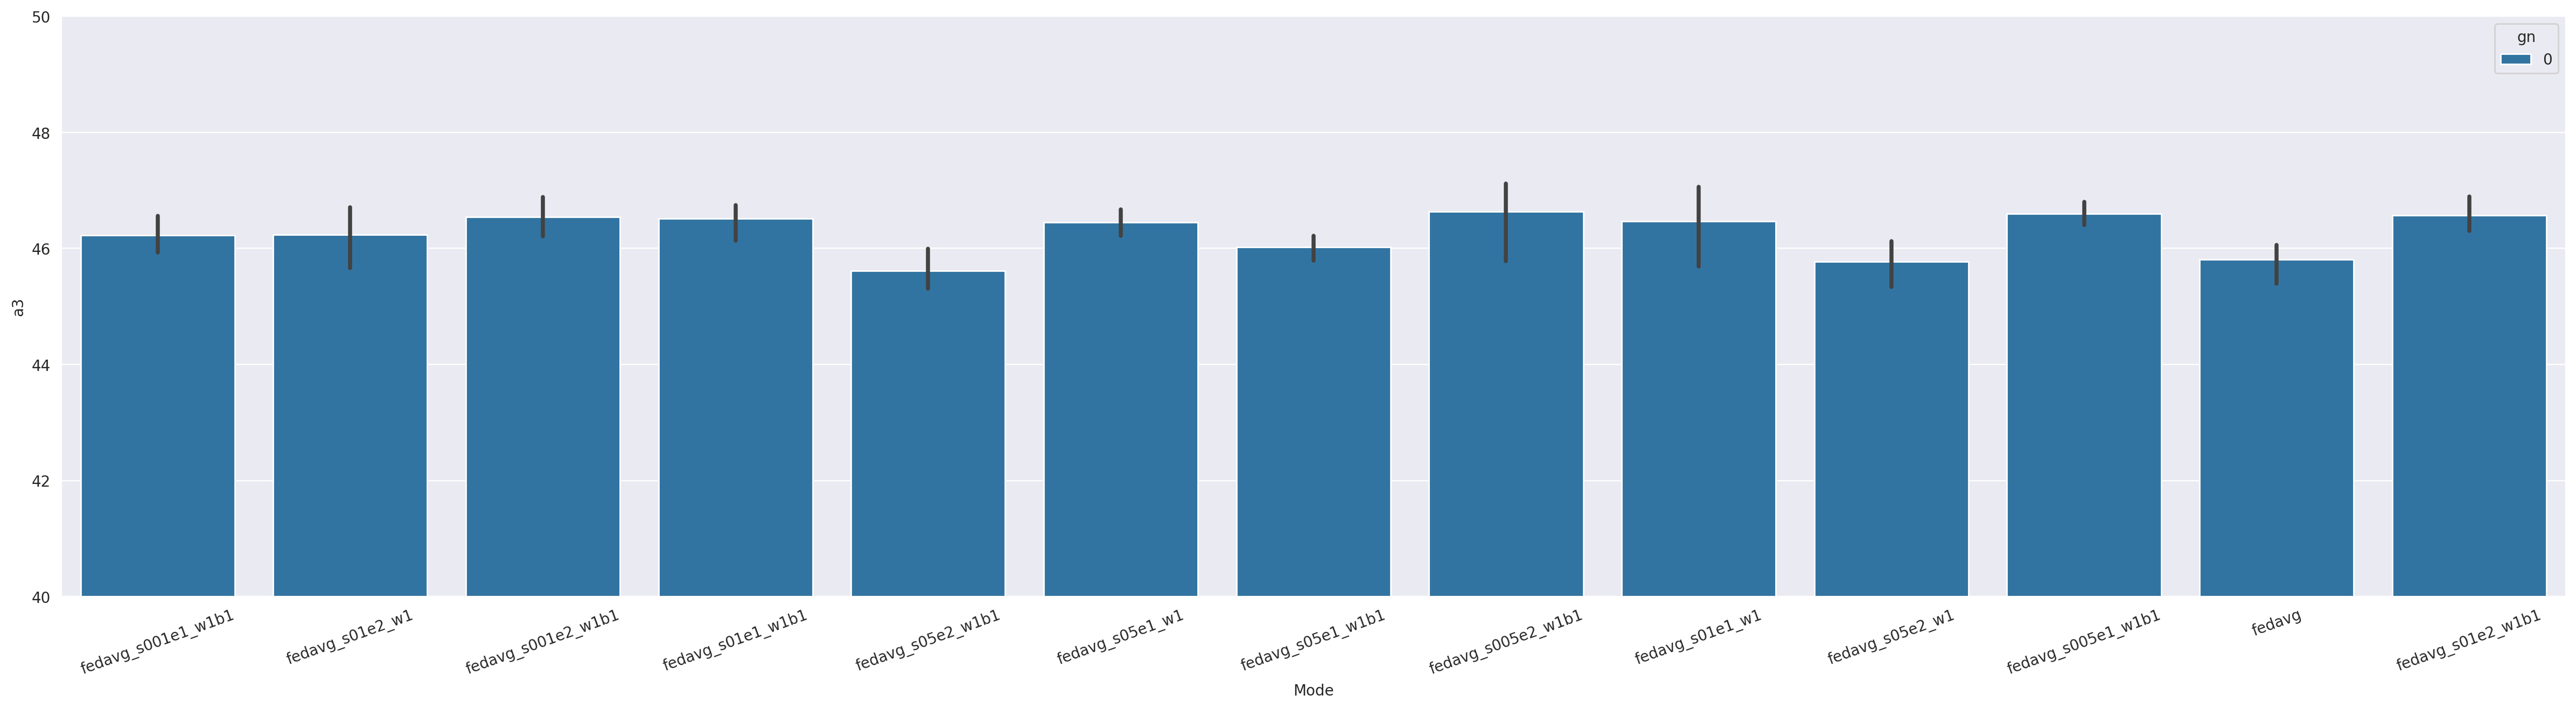

In [18]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(30,7), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    # temp = temp[(temp["epoch"] == 299) | (temp["epoch"] == 599) | (temp["epoch"] == 799) | (temp["epoch"] == 999)]
    temp = temp[(temp["epoch"] == 999)]
    temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddyn") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="gn", ax=ax)
    ax.set_ylim([40,50])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
    for txt in ax.get_xticklabels():
        if "e3" in txt.get_text(): txt.set_fontweight('bold')
        if "e4" in txt.get_text(): txt.set_fontweight('bold')
        if "e5" in txt.get_text(): txt.set_fontweight('bold')
        if "PCOS" in txt.get_text(): txt.set_color("red")
# print(ax.get_xticklabels())

../Output/CIFAR100-fedavg-G05-B0-D0.3-N100-P0.01__Mean5-LR0.1/s4.csv
../Output/CIFAR100-fedavg-G05-B0-D0.3-N100-P0.01__Mean5-LR0.1/s1.csv
../Output/CIFAR100-fedavg-G05-B0-D0.3-N100-P0.01__Mean5-LR0.1/s2.csv
../Output/CIFAR100-fedavg-G05-B0-D0.3-N100-P0.01__Mean5-LR0.1/s3.csv
../Output/CIFAR100-fedprox-G05-B0-D0.3-N100-P0.01__Mean5-LR0.1/s4.csv
../Output/CIFAR100-fedprox-G05-B0-D0.3-N100-P0.01__Mean5-LR0.1/s1.csv
../Output/CIFAR100-fedprox-G05-B0-D0.3-N100-P0.01__Mean5-LR0.1/s2.csv
../Output/CIFAR100-fedprox-G05-B0-D0.3-N100-P0.01__Mean5-LR0.1/s3.csv
../Output/CIFAR100-fedavg-G05-B0-D0-N100-P0.01__FCs0.5_Mean5-LR0.1/s1.csv
../Output/CIFAR100-fedavg-G05-B0-D0-N100-P0.01__FCs0.5_Mean5-LR0.1/s2.csv
../Output/CIFAR100-fedavg-G05-B0-D0-N100-P0.01__Mean5/s1.csv
../Output/CIFAR100-fedavg-G05-B0-D0-N100-P0.01__Mean5/s2.csv
../Output/CIFAR100-feddyn-G05-B0-D0-N100-P0.01__Mean5-LR0.1/s4.csv
../Output/CIFAR100-feddyn-G05-B0-D0-N100-P0.01__Mean5-LR0.1/s1.csv
../Output/CIFAR100-feddyn-G05-B0-D0-N100

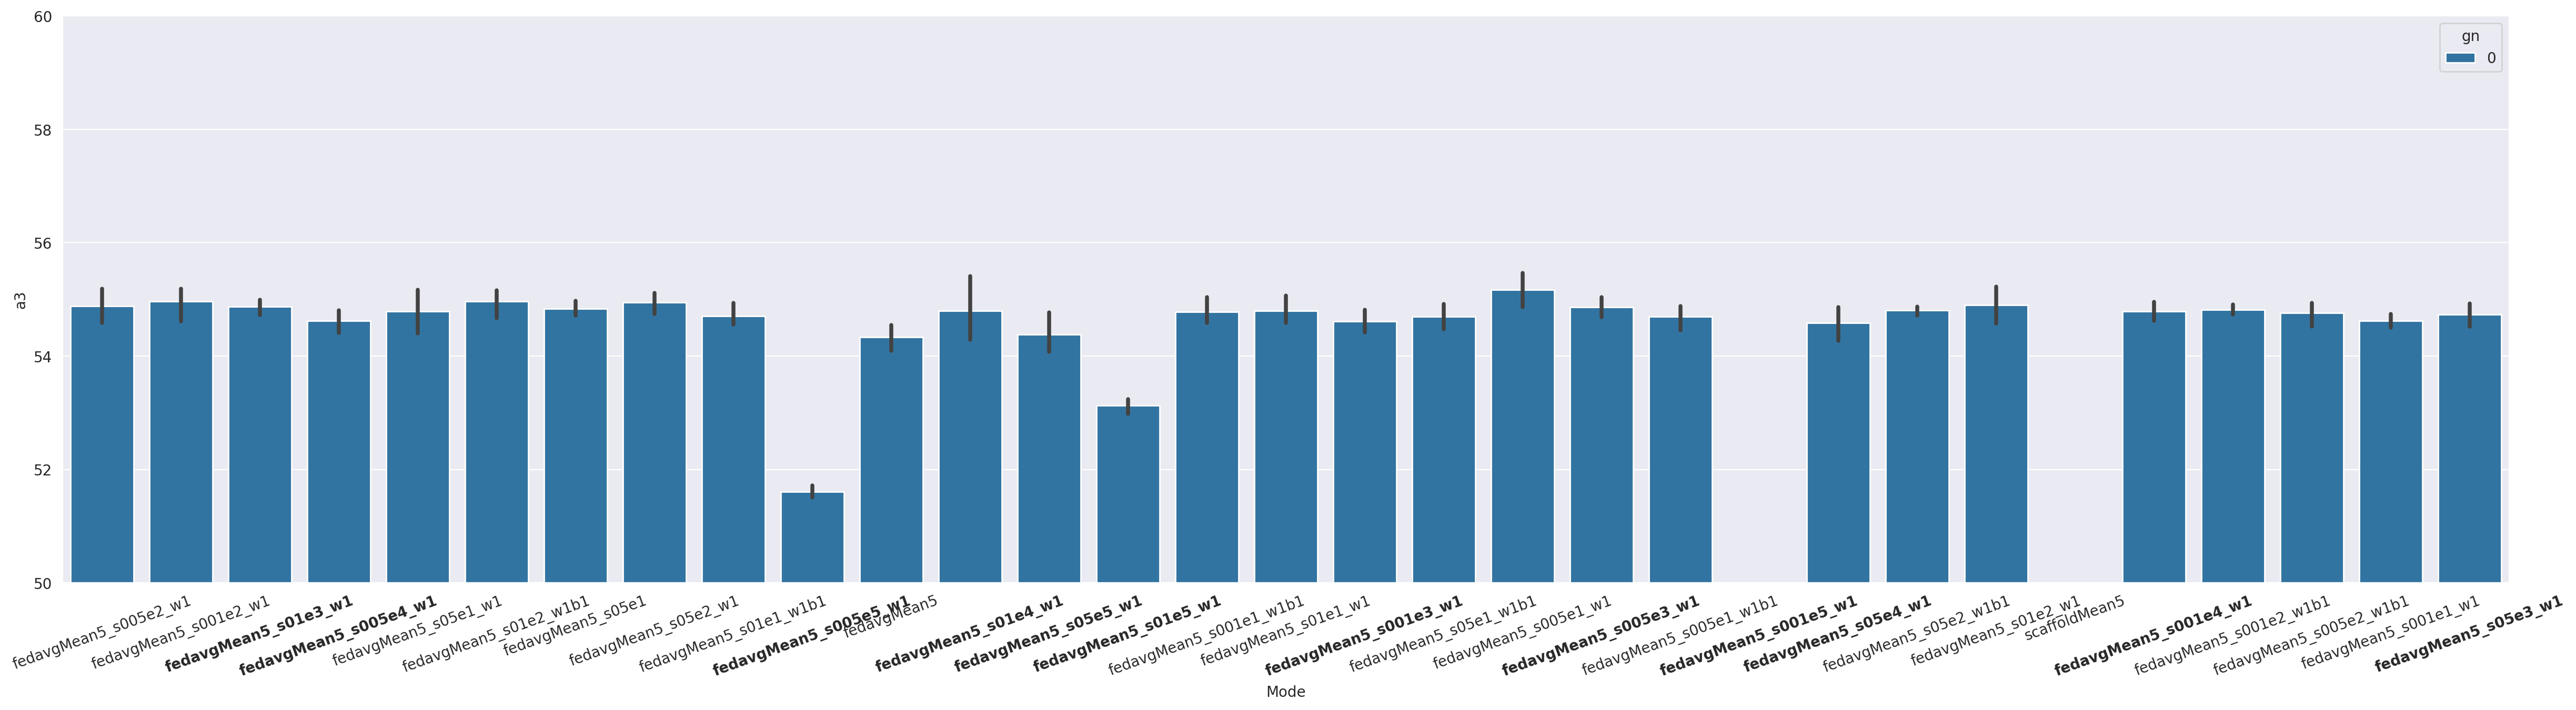

In [22]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(30,7), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    # temp = temp[(temp["epoch"] == 299) | (temp["epoch"] == 599) | (temp["epoch"] == 799) | (temp["epoch"] == 999)]
    temp = temp[(temp["epoch"] == 999)]
    temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddyn") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="gn", ax=ax)
    ax.set_ylim([50,60])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
    for txt in ax.get_xticklabels():
        if "e3" in txt.get_text(): txt.set_fontweight('bold')
        if "e4" in txt.get_text(): txt.set_fontweight('bold')
        if "e5" in txt.get_text(): txt.set_fontweight('bold')
        if "PCOS" in txt.get_text(): txt.set_color("red")
# print(ax.get_xticklabels())

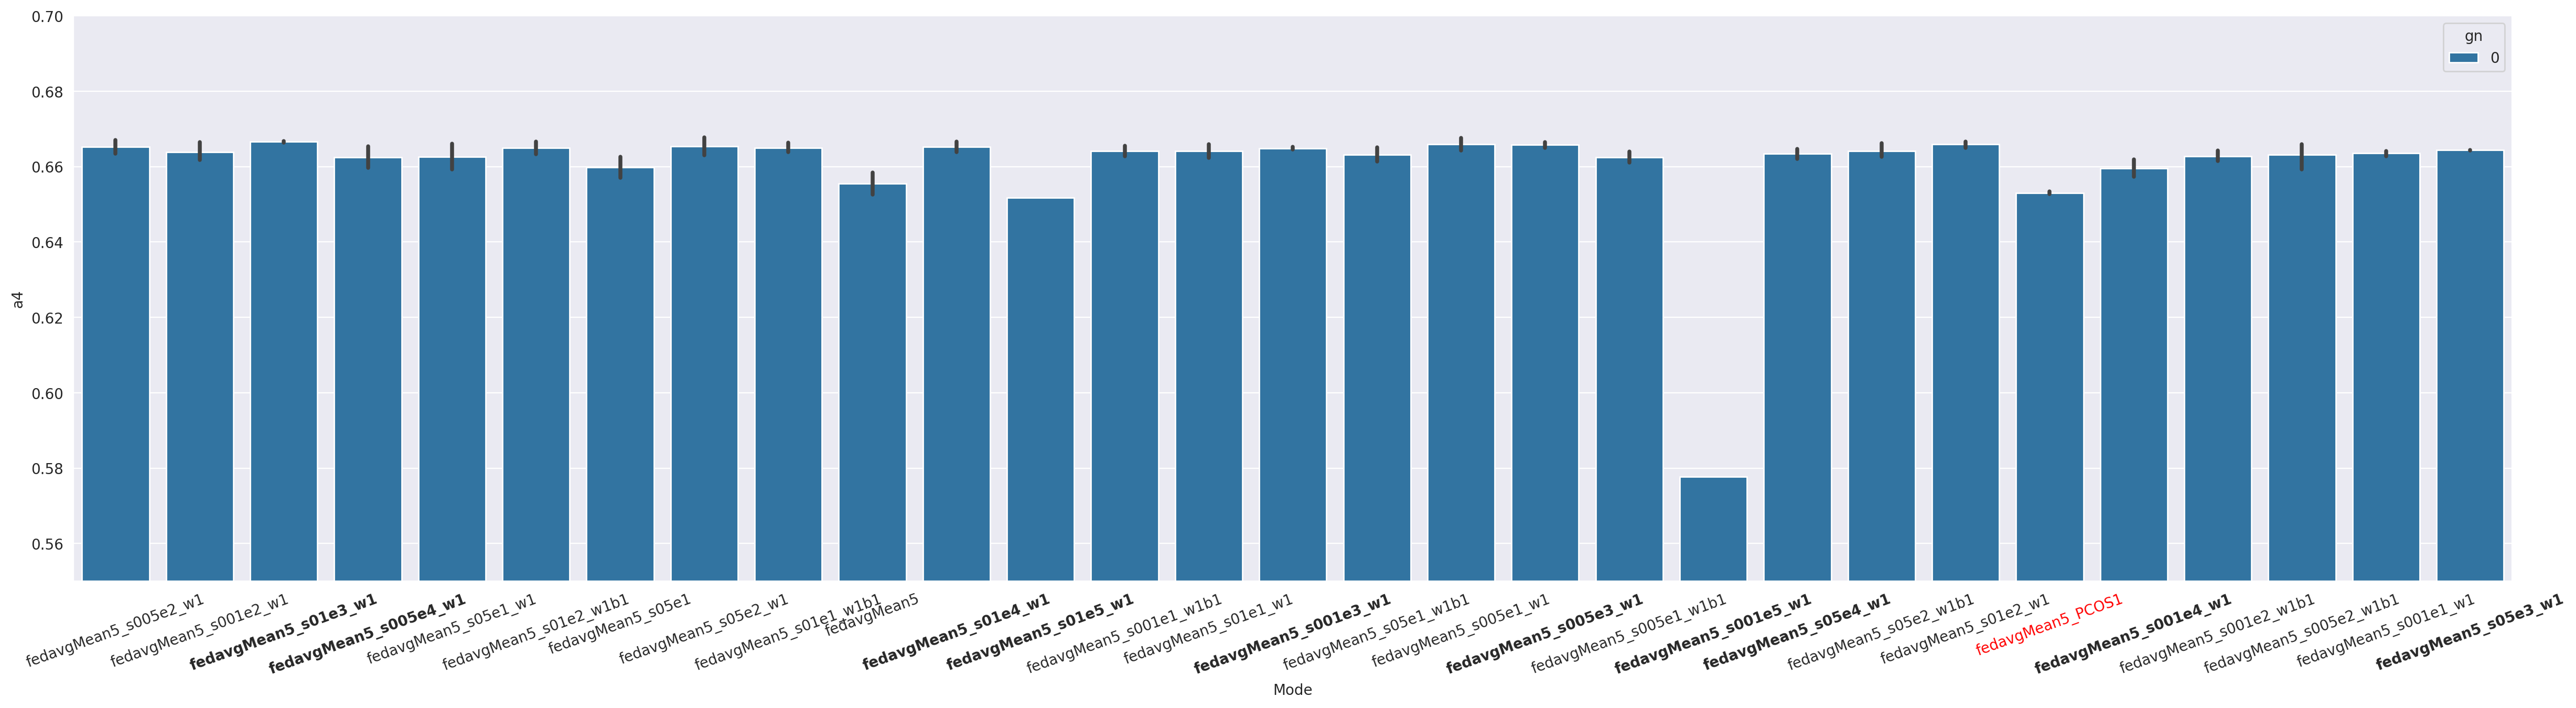

In [64]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(30,7), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    # temp = temp[(temp["epoch"] == 299) | (temp["epoch"] == 599) | (temp["epoch"] == 799) | (temp["epoch"] == 999)]
    temp = temp[(temp["epoch"] == 999)]
    temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddyn") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    temp = temp[(temp["Mode"] != "fedavg") & (temp["Mode"] != "fedavg_PCOS1")]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a4", hue="gn", ax=ax)
    ax.set_ylim([0.55,0.70])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
    for txt in ax.get_xticklabels():
        if "e3" in txt.get_text(): txt.set_fontweight('bold')
        if "e4" in txt.get_text(): txt.set_fontweight('bold')
        if "e5" in txt.get_text(): txt.set_fontweight('bold')
        if "PCOS" in txt.get_text(): txt.set_color("red")
# print(ax.get_xticklabels())

In [42]:
temp[temp["Mode"] == "fedavgMean5_s01e3_w1"]

,Unnamed: 0,task,mode,gn,balance,distribution,n_clients,act_prob,seed,epoch,a1,a2,a3,a4,l1,l2,l3,l4,Mode,Distribution
99,99,CIFAR100,fedavg,0,0,0.0,100,0.01,1,999,38.54,0.44690,54.99,0.66684,3.207860,2.609763,1.827239,1.207398,fedavgMean5_s01e3_w1,Balanced IID partition
99,99,CIFAR100,fedavg,0,0,0.0,100,0.01,3,999,37.91,0.43804,55.23,0.66630,3.348464,2.750113,1.839334,1.203370,fedavgMean5_s01e3_w1,Balanced IID partition
